# Análisis Exploratorio de Datos

## Descripción
En este proyecto, realizaré un análisis exploratorio de los datos proporcionados. El objetivo es entender la estructura, distribución y relaciones entre las variables para preparar los datos para el modelado posterior.

## Contenido
- Exploración inicial de los datos
- Análisis de valores faltantes
- Estadísticas descriptivas
- Visualización de distribuciones
- Análisis de correlaciones
- Identificación de outliers
- Conclusiones preliminares

## Datos
Los datos contienen información sobre rendimiento académico clasificado en diferentes categorías (bajo, medio-bajo, medio-alto, alto).

## Herramientas utilizadas
- Python
- Pandas
- NumPy
- Matplotlib
- Seaborn


In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display


In [3]:
# Configuración para visualización
plt.style.use('ggplot')
sns.set(style="whitegrid")
%matplotlib inline

In [4]:
def cargar_dataset(ruta_archivo, nombre="Dataset"):
    """
    Función para cargar un dataset CSV y mostrar información básica
    
    Args:
        ruta_archivo (str): Ruta al archivo CSV
        nombre (str): Nombre descriptivo del dataset
    
    Returns:
        DataFrame: El dataset cargado
    """
    # Verificar si el archivo existe
    if not os.path.exists(ruta_archivo):
        print(f"Error: El archivo {ruta_archivo} no existe.")
        return None
    
    try:
        # Cargar el archivo CSV con pandas
        df = pd.read_csv(ruta_archivo)
        
        # Mostrar información básica
        print(f"\n{'='*50}")
        print(f"INFORMACIÓN DEL DATASET: {nombre}")
        print(f"{'='*50}")
        print(f"Número de filas: {df.shape[0]}")
        print(f"Número de columnas: {df.shape[1]}")
        print(f"Columnas: {', '.join(df.columns)}")
        
        # Mostrar las primeras filas
        print(f"\nPrimeras 5 filas de {nombre}:")
        display(df.head())
        
        return df
    
    except Exception as e:
        print(f"Error al cargar el archivo: {e}")
        return None

# Cargar los datasets
print("Cargando datasets...")
train_df = cargar_dataset("Data/train.csv", "Train Dataset")
test_df = cargar_dataset("Data/test.csv", "Test Dataset")

Cargando datasets...

INFORMACIÓN DEL DATASET: Train Dataset
Número de filas: 692500
Número de columnas: 21
Columnas: ID, PERIODO, ESTU_PRGM_ACADEMICO, ESTU_PRGM_DEPARTAMENTO, ESTU_VALORMATRICULAUNIVERSIDAD, ESTU_HORASSEMANATRABAJA, FAMI_ESTRATOVIVIENDA, FAMI_TIENEINTERNET, FAMI_EDUCACIONPADRE, FAMI_TIENELAVADORA, FAMI_TIENEAUTOMOVIL, ESTU_PRIVADO_LIBERTAD, ESTU_PAGOMATRICULAPROPIO, FAMI_TIENECOMPUTADOR, FAMI_TIENEINTERNET.1, FAMI_EDUCACIONMADRE, RENDIMIENTO_GLOBAL, coef_1, coef_2, coef_3, coef_4

Primeras 5 filas de Train Dataset:


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294



INFORMACIÓN DEL DATASET: Test Dataset
Número de filas: 296786
Número de columnas: 20
Columnas: ID, PERIODO, ESTU_PRGM_ACADEMICO, ESTU_PRGM_DEPARTAMENTO, ESTU_VALORMATRICULAUNIVERSIDAD, ESTU_HORASSEMANATRABAJA, FAMI_ESTRATOVIVIENDA, FAMI_TIENEINTERNET, FAMI_EDUCACIONPADRE, FAMI_TIENELAVADORA, FAMI_TIENEAUTOMOVIL, ESTU_PRIVADO_LIBERTAD, ESTU_PAGOMATRICULAPROPIO, FAMI_TIENECOMPUTADOR, FAMI_TIENEINTERNET.1, FAMI_EDUCACIONMADRE, coef_1, coef_2, coef_3, coef_4

Primeras 5 filas de Test Dataset:


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,coef_1,coef_2,coef_3,coef_4
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa,0.328,0.219,0.317,0.247
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa,0.227,0.283,0.296,0.324
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.285,0.228,0.294,0.247
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta,0.160,0.408,0.217,0.294
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.209,0.283,0.306,0.286


In [5]:
def analizar_tipos_y_nulos(df, nombre="Dataset"):
    """
    Analiza los tipos de datos y valores nulos en el dataset
    
    Args:
        df (DataFrame): Dataset a analizar
        nombre (str): Nombre descriptivo del dataset
    """
    if df is None:
        return
    
    print(f"\n{'='*50}")
    print(f"ANÁLISIS DE TIPOS Y VALORES NULOS: {nombre}")
    print(f"{'='*50}")
    
    # Información sobre tipos de datos
    print("\nInformación sobre tipos de datos:")
    # Usar io.StringIO en lugar de pd.io.StringIO
    from io import StringIO
    buffer = StringIO()
    df.info(buf=buffer)
    print(buffer.getvalue())
    
    # Estadísticas descriptivas básicas
    print("\nEstadísticas descriptivas básicas:")
    display(df.describe(include='all').T)
    
    # Verificar valores nulos
    print("\nValores nulos por columna:")
    nulos = pd.DataFrame(df.isnull().sum(), columns=['Valores nulos'])
    nulos['Porcentaje (%)'] = (df.isnull().sum() / len(df) * 100).round(2)
    display(nulos[nulos['Valores nulos'] > 0])  # Solo mostrar columnas con valores nulos

# Analizar tipos de datos y valores nulos
if train_df is not None:
    analizar_tipos_y_nulos(train_df, "Train Dataset")



ANÁLISIS DE TIPOS Y VALORES NULOS: Train Dataset

Información sobre tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              692500 non-null  int64  
 1   PERIODO                         692500 non-null  int64  
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object 
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object 
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object 
 7   FAMI_TIENEINTERNET              665871 non-null  object 
 8   FAMI_EDUCACIONPADRE             669322 non-null  object 
 9   FAMI_TIENELAVADORA              652727 non-null  object 
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,692500.0,NaN,NaN,NaN,494606.130576,285585.209455,1.0,247324.75,494564.5,741782.5,989286.0
PERIODO,692500.0,NaN,NaN,NaN,20198.366679,10.535037,20183.0,20195.0,20195.0,20203.0,20213.0
ESTU_PRGM_ACADEMICO,692500,948,DERECHO,53244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTU_PRGM_DEPARTAMENTO,692500,31,BOGOTÁ,282159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTU_VALORMATRICULAUNIVERSIDAD,686213,8,Entre 1 millón y menos de 2.5 millones,204048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTU_HORASSEMANATRABAJA,661643,5,Más de 30 horas,249352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAMI_ESTRATOVIVIENDA,660363,7,Estrato 2,232671,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAMI_TIENEINTERNET,665871,2,Si,592514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAMI_EDUCACIONPADRE,669322,12,Secundaria (Bachillerato) completa,128289,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAMI_TIENELAVADORA,652727,2,Si,563390,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Valores nulos por columna:


,Valores nulos,Porcentaje (%)
ESTU_VALORMATRICULAUNIVERSIDAD,6287,0.91
ESTU_HORASSEMANATRABAJA,30857,4.46
FAMI_ESTRATOVIVIENDA,32137,4.64
FAMI_TIENEINTERNET,26629,3.85
FAMI_EDUCACIONPADRE,23178,3.35
FAMI_TIENELAVADORA,39773,5.74
FAMI_TIENEAUTOMOVIL,43623,6.30
ESTU_PAGOMATRICULAPROPIO,6498,0.94
FAMI_TIENECOMPUTADOR,38103,5.50
FAMI_TIENEINTERNET.1,26629,3.85



ANÁLISIS DE LA VARIABLE OBJETIVO (RENDIMIENTO_GLOBAL)

Conteo por categoría de rendimiento:


RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-alto    171619
medio-bajo    172275
Name: count, dtype: int64


Porcentaje por categoría de rendimiento:


,Conteo,Porcentaje (%)
RENDIMIENTO_GLOBAL,,
alto,175619,25.36
bajo,172987,24.98
medio-alto,171619,24.78
medio-bajo,172275,24.88


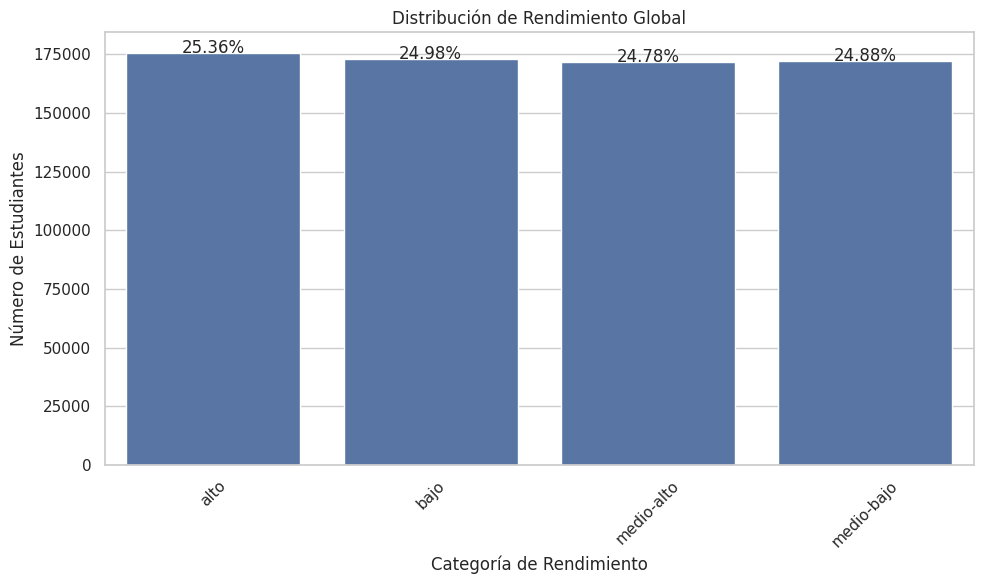

In [6]:
def analizar_variable_objetivo(df):
    """
    Analiza la distribución de la variable objetivo RENDIMIENTO_GLOBAL
    
    Args:
        df (DataFrame): Dataset con la variable objetivo
    """
    if df is None or 'RENDIMIENTO_GLOBAL' not in df.columns:
        print("No se encontró la variable objetivo 'RENDIMIENTO_GLOBAL' en el dataset.")
        return
    
    print(f"\n{'='*50}")
    print("ANÁLISIS DE LA VARIABLE OBJETIVO (RENDIMIENTO_GLOBAL)")
    print(f"{'='*50}")
    
    # Distribución de la variable objetivo
    rendimiento_counts = df['RENDIMIENTO_GLOBAL'].value_counts().sort_index()
    
    print("\nConteo por categoría de rendimiento:")
    display(rendimiento_counts)
    
    # Porcentaje por categoría
    print("\nPorcentaje por categoría de rendimiento:")
    porcentajes = (rendimiento_counts / rendimiento_counts.sum() * 100).round(2)
    display(pd.DataFrame({
        'Conteo': rendimiento_counts,
        'Porcentaje (%)': porcentajes
    }))
    
    # Visualización de la distribución
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x='RENDIMIENTO_GLOBAL', data=df, order=rendimiento_counts.index)
    
    # Añadir etiquetas con los porcentajes
    for i, p in enumerate(ax.patches):
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 0.1,
                f'{porcentajes.iloc[i]}%',
                ha="center")
    
    plt.title('Distribución de Rendimiento Global')
    plt.xlabel('Categoría de Rendimiento')
    plt.ylabel('Número de Estudiantes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Analizar la variable objetivo en el dataset de entrenamiento
if train_df is not None:
    analizar_variable_objetivo(train_df)


ANÁLISIS DE VARIABLES CATEGÓRICAS (Top 3)

--------------------------------------------------
Análisis de la variable: ESTU_PRGM_ACADEMICO
--------------------------------------------------

Número total de categorías: 948

Top 10 categorías más frecuentes:


,Conteo,Porcentaje (%)
ESTU_PRGM_ACADEMICO,,
DERECHO,53244,7.69
ADMINISTRACION DE EMPRESAS,51902,7.49
CONTADURIA PUBLICA,39664,5.73
PSICOLOGIA,31932,4.61
INGENIERIA INDUSTRIAL,28481,4.11
ADMINISTRACIÓN DE EMPRESAS,24777,3.58
INGENIERIA CIVIL,19487,2.81
MEDICINA,18099,2.61
PSICOLOGÍA,17377,2.51


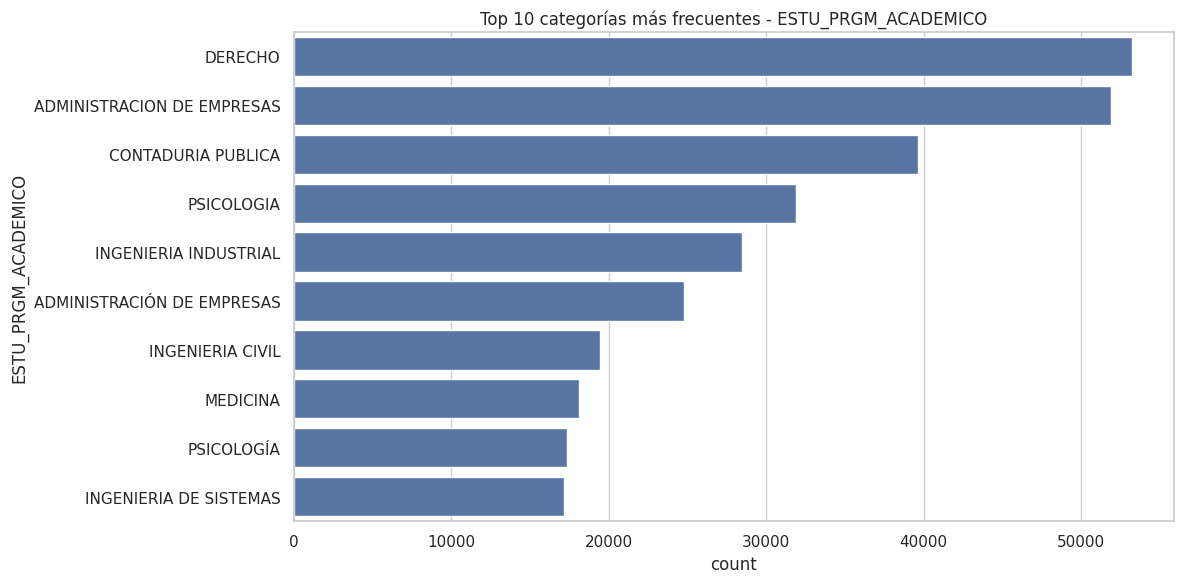


Relación entre ESTU_PRGM_ACADEMICO y RENDIMIENTO_GLOBAL:


RENDIMIENTO_GLOBAL,alto,bajo,medio-alto,medio-bajo
ESTU_PRGM_ACADEMICO,,,,
ADMINISTRACION DE EMPRESAS,17.92,29.99,24.02,28.06
ADMINISTRACIÓN DE EMPRESAS,8.38,36.70,22.01,32.91
CONTADURIA PUBLICA,12.63,30.96,25.09,31.33
DERECHO,29.07,21.28,26.09,23.57
INGENIERIA CIVIL,40.34,13.57,26.90,19.18
INGENIERIA DE SISTEMAS,25.73,22.19,26.78,25.31
INGENIERIA INDUSTRIAL,33.25,16.70,27.18,22.87
MEDICINA,55.50,7.56,23.61,13.33
PSICOLOGIA,23.44,25.20,24.95,26.42


<Figure size 1400x800 with 0 Axes>

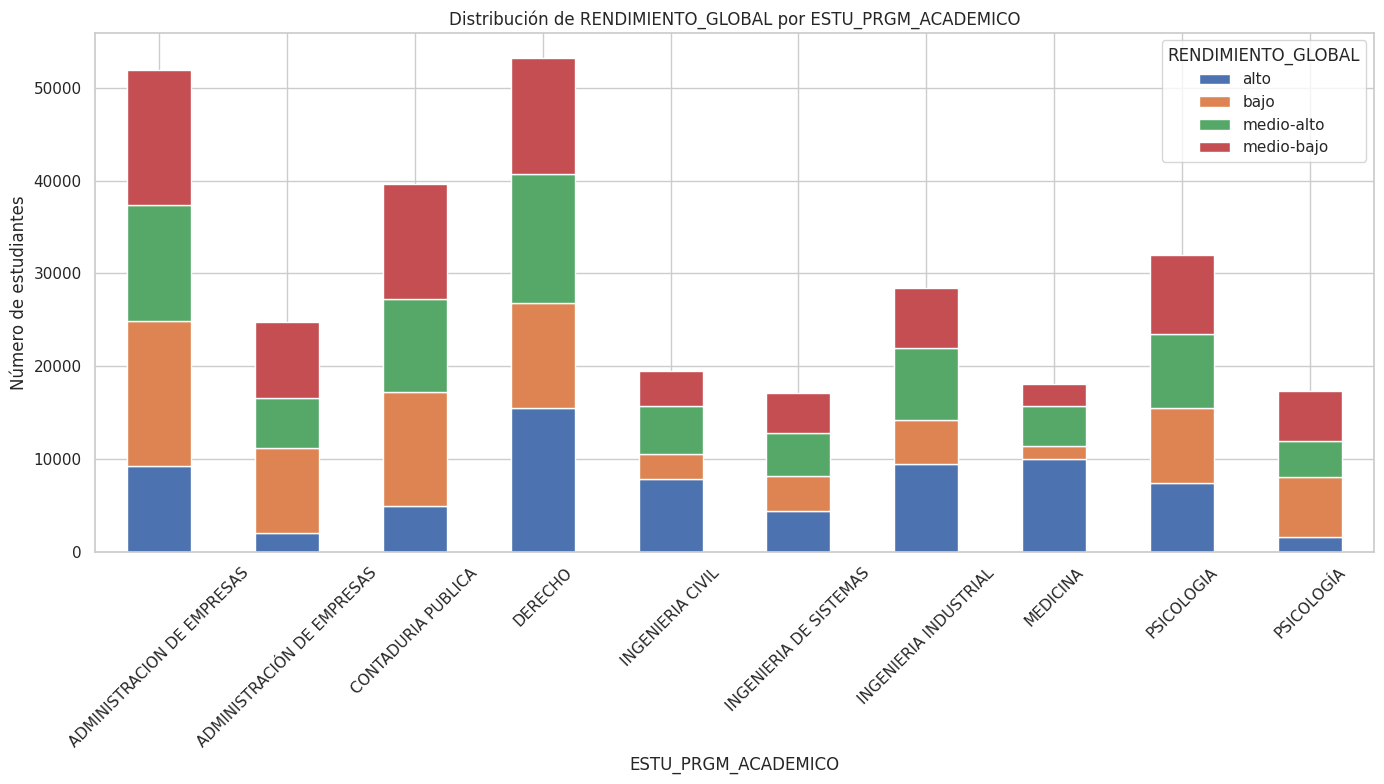


--------------------------------------------------
Análisis de la variable: ESTU_PRGM_DEPARTAMENTO
--------------------------------------------------

Número total de categorías: 31

Top 10 categorías más frecuentes:


,Conteo,Porcentaje (%)
ESTU_PRGM_DEPARTAMENTO,,
BOGOTÁ,282159,40.74
ANTIOQUIA,83607,12.07
VALLE,44588,6.44
ATLANTICO,41020,5.92
SANTANDER,28828,4.16
NORTE SANTANDER,22588,3.26
BOLIVAR,20629,2.98
BOYACA,14048,2.03
CUNDINAMARCA,14018,2.02


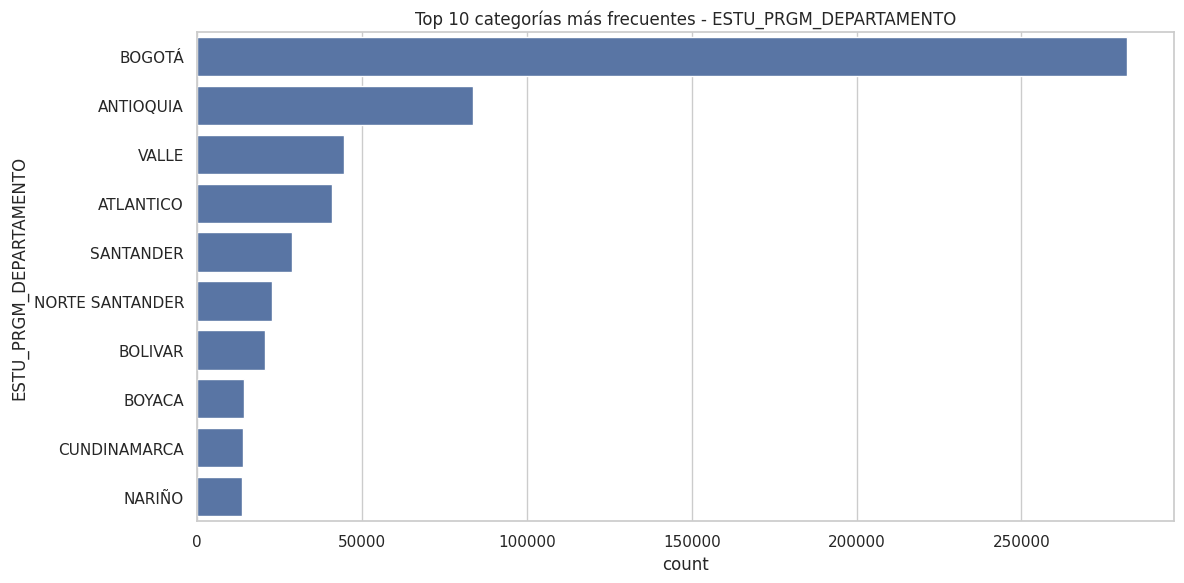


Relación entre ESTU_PRGM_DEPARTAMENTO y RENDIMIENTO_GLOBAL:


RENDIMIENTO_GLOBAL,alto,bajo,medio-alto,medio-bajo
ESTU_PRGM_DEPARTAMENTO,,,,
ANTIOQUIA,30.72,20.59,25.90,22.78
ATLANTICO,24.78,27.20,23.12,24.90
BOGOTÁ,27.43,23.65,24.53,24.40
BOLIVAR,18.50,31.88,23.06,26.55
BOYACA,26.84,16.64,31.61,24.91
CUNDINAMARCA,40.80,14.12,25.60,19.49
NARIÑO,16.91,25.78,27.30,30.01
NORTE SANTANDER,13.71,31.35,25.12,29.82
SANTANDER,32.25,17.96,26.88,22.90


<Figure size 1400x800 with 0 Axes>

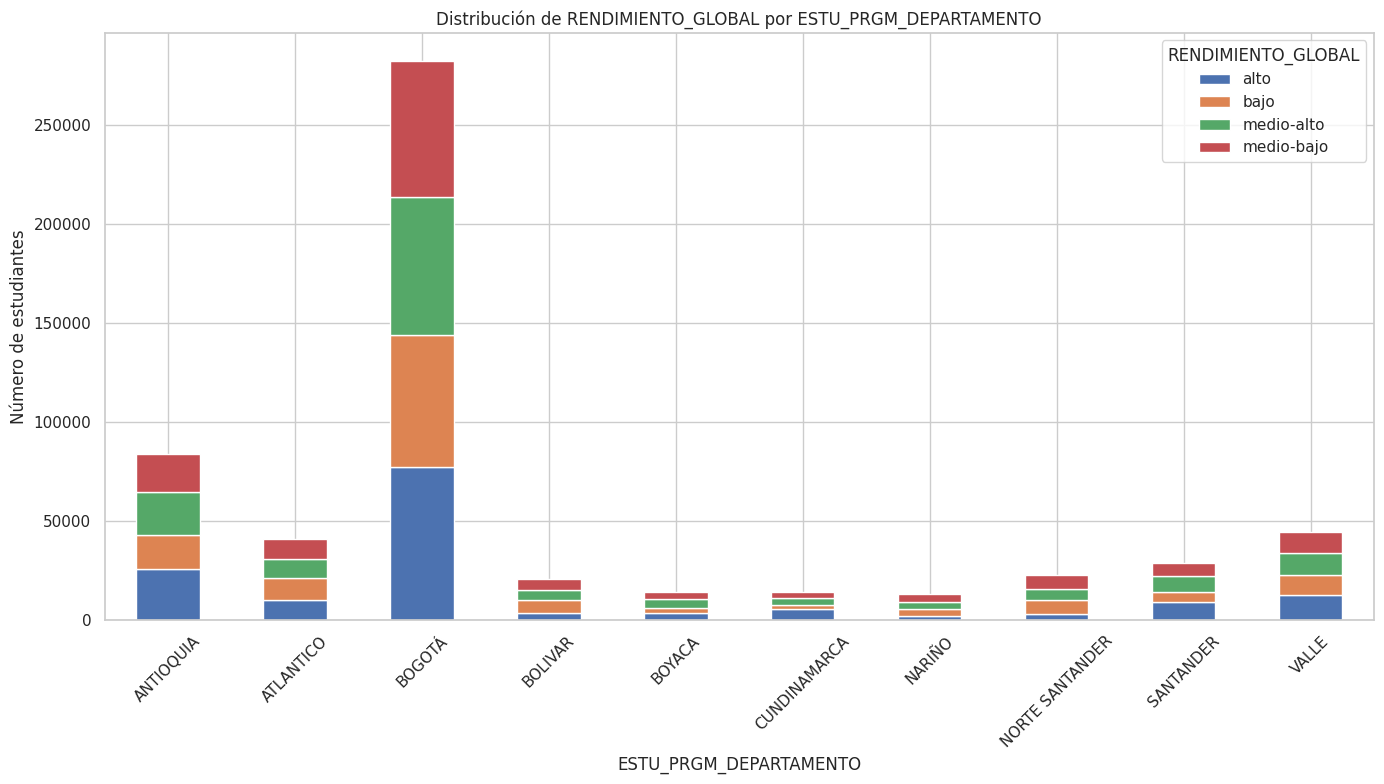


--------------------------------------------------
Análisis de la variable: ESTU_VALORMATRICULAUNIVERSIDAD
--------------------------------------------------

Número total de categorías: 8

Top 10 categorías más frecuentes:


,Conteo,Porcentaje (%)
ESTU_VALORMATRICULAUNIVERSIDAD,,
Entre 1 millón y menos de 2.5 millones,204048,29.47
Entre 2.5 millones y menos de 4 millones,127430,18.40
Menos de 500 mil,80263,11.59
Entre 500 mil y menos de 1 millón,78704,11.37
Entre 4 millones y menos de 5.5 millones,69736,10.07
Más de 7 millones,68014,9.82
Entre 5.5 millones y menos de 7 millones,38490,5.56
No pagó matrícula,19528,2.82


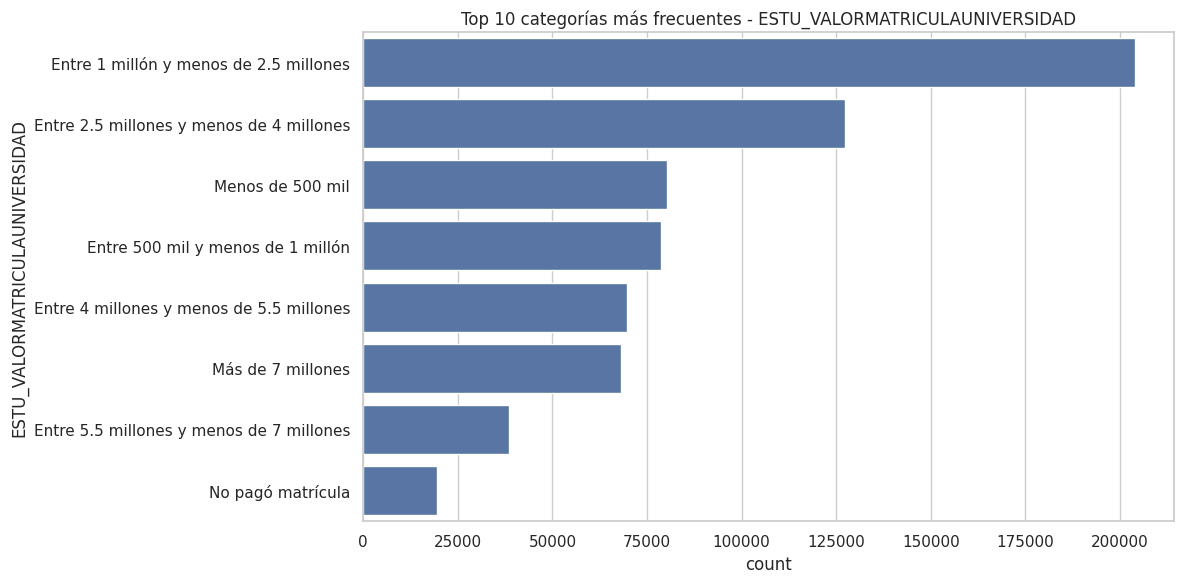


Relación entre ESTU_VALORMATRICULAUNIVERSIDAD y RENDIMIENTO_GLOBAL:


RENDIMIENTO_GLOBAL,alto,bajo,medio-alto,medio-bajo
ESTU_VALORMATRICULAUNIVERSIDAD,,,,
Entre 1 millón y menos de 2.5 millones,13.12,35.34,21.70,29.83
Entre 2.5 millones y menos de 4 millones,17.41,26.46,27.11,29.03
Entre 4 millones y menos de 5.5 millones,28.73,16.79,30.42,24.07
Entre 5.5 millones y menos de 7 millones,38.66,12.08,29.51,19.75
Entre 500 mil y menos de 1 millón,20.81,28.62,24.29,26.27
Menos de 500 mil,29.87,22.41,26.20,21.51
Más de 7 millones,64.16,5.43,20.57,9.85
No pagó matrícula,27.97,27.57,23.50,20.96


<Figure size 1400x800 with 0 Axes>

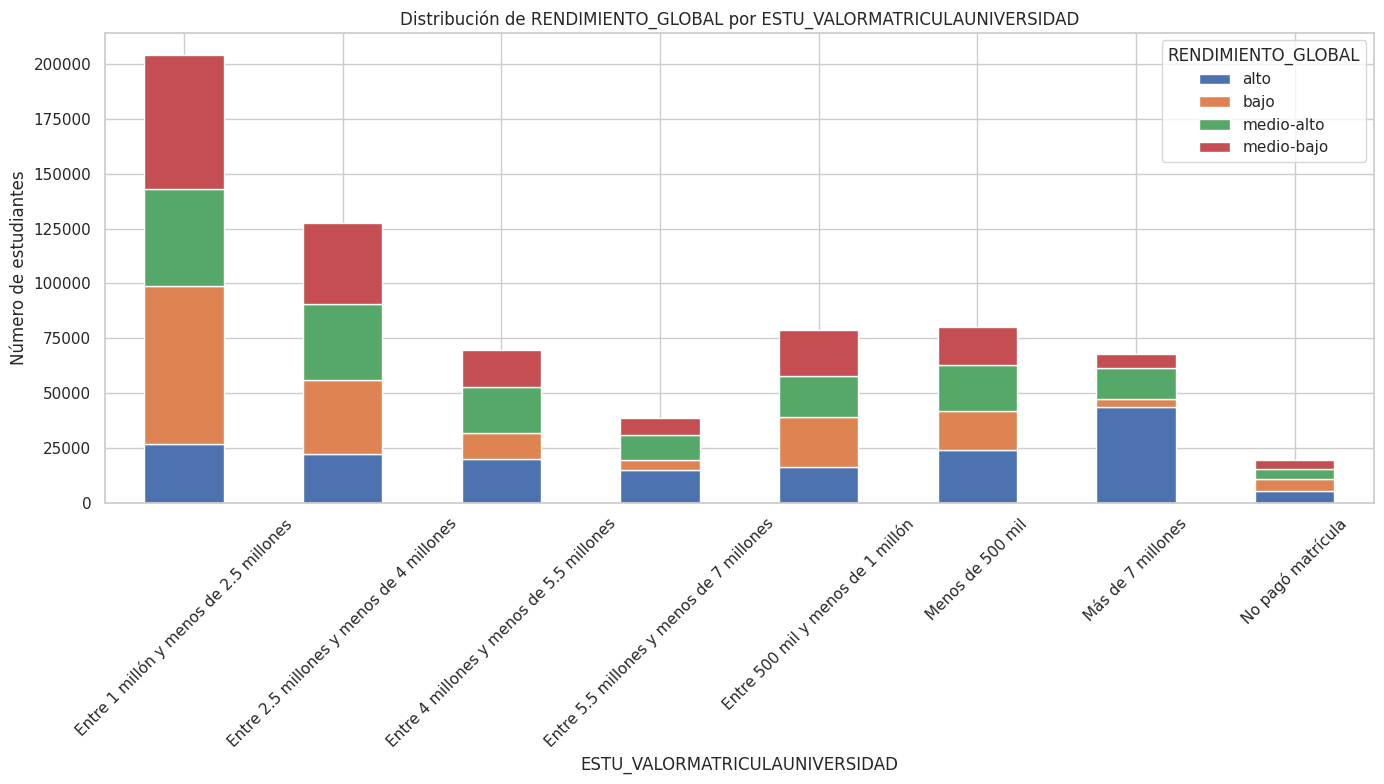

In [7]:
def analizar_variables_categoricas(df, n_vars=3):
    """
    Analiza las variables categóricas del dataset y su relación con la variable objetivo
    
    Args:
        df (DataFrame): Dataset a analizar
        n_vars (int): Número máximo de variables a analizar
    """
    if df is None:
        return
    
    # Identificar variables categóricas (excluyendo ID y la variable objetivo)
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    categorical_cols = [col for col in categorical_cols if col != 'RENDIMIENTO_GLOBAL' and col != 'ID']
    
    if not categorical_cols:
        print("\nNo se encontraron variables categóricas para analizar.")
        return
    
    print(f"\n{'='*50}")
    print(f"ANÁLISIS DE VARIABLES CATEGÓRICAS (Top {min(n_vars, len(categorical_cols))})")
    print(f"{'='*50}")
    
    # Limitar el número de variables a analizar
    categorical_cols = categorical_cols[:n_vars]
    
    for col in categorical_cols:
        print(f"\n{'-'*50}")
        print(f"Análisis de la variable: {col}")
        print(f"{'-'*50}")
        
        # Distribución de la variable
        col_counts = df[col].value_counts()
        n_categories = len(col_counts)
        
        print(f"\nNúmero total de categorías: {n_categories}")
        print("\nTop 10 categorías más frecuentes:")
        
        top_categories = col_counts.head(10)
        display(pd.DataFrame({
            'Conteo': top_categories,
            'Porcentaje (%)': (top_categories / len(df) * 100).round(2)
        }))
        
        # Visualización
        plt.figure(figsize=(12, 6))
        sns.countplot(y=col, data=df, order=col_counts.index[:10])
        plt.title(f'Top 10 categorías más frecuentes - {col}')
        plt.tight_layout()
        plt.show()
        
        # Relación con la variable objetivo (si existe)
        if 'RENDIMIENTO_GLOBAL' in df.columns:
            print(f"\nRelación entre {col} y RENDIMIENTO_GLOBAL:")
            
            # Crear tabla cruzada (solo para las 10 categorías más frecuentes)
            top_cats = col_counts.head(10).index
            filtered_df = df[df[col].isin(top_cats)]
            
            cross_tab = pd.crosstab(
                filtered_df[col], 
                filtered_df['RENDIMIENTO_GLOBAL'],
                normalize='index'
            ) * 100
            
            display(cross_tab.round(2))
            
            # Visualización de la relación
            plt.figure(figsize=(14, 8))
            
            # Gráfico de barras apiladas
            cross_tab_abs = pd.crosstab(filtered_df[col], filtered_df['RENDIMIENTO_GLOBAL'])
            cross_tab_abs.plot(kind='bar', stacked=True, figsize=(14, 8))
            plt.title(f'Distribución de RENDIMIENTO_GLOBAL por {col}')
            plt.xlabel(col)
            plt.ylabel('Número de estudiantes')
            plt.xticks(rotation=45)
            plt.legend(title='RENDIMIENTO_GLOBAL')
            plt.tight_layout()
            plt.show()

# Analizar variables categóricas en el dataset de entrenamiento
if train_df is not None:
    analizar_variables_categoricas(train_df)


ANÁLISIS DE VARIABLES NUMÉRICAS (Top 3)

--------------------------------------------------
Análisis de la variable: PERIODO
--------------------------------------------------

Estadísticas descriptivas:


count    692500.000000
mean      20198.366679
std          10.535037
min       20183.000000
25%       20195.000000
50%       20195.000000
75%       20203.000000
max       20213.000000
Name: PERIODO, dtype: float64

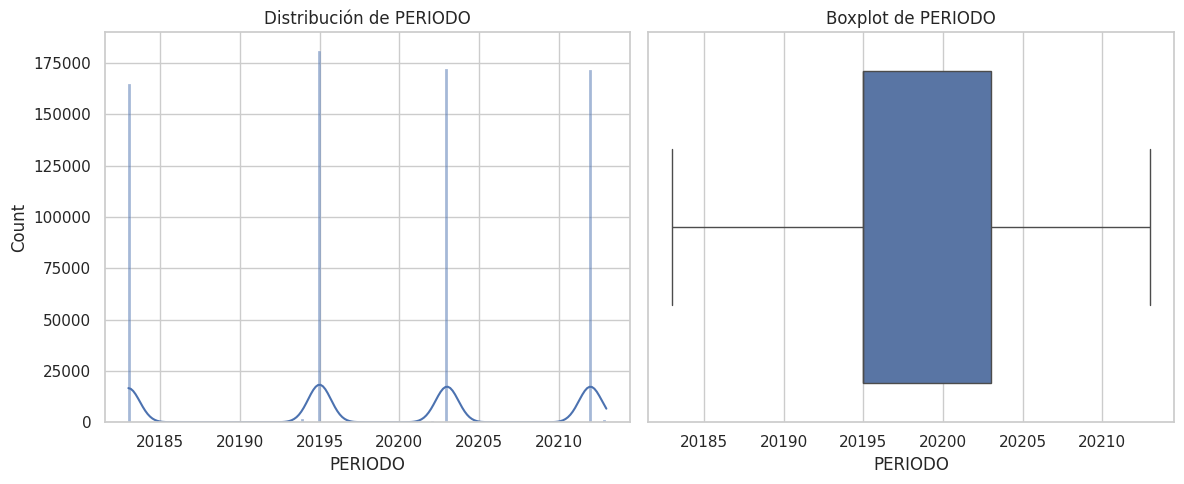


Relación entre PERIODO y RENDIMIENTO_GLOBAL:


,mean,median,std,min,max
RENDIMIENTO_GLOBAL,,,,,
alto,20198.05,20203.0,10.53,20183,20213
bajo,20199.44,20203.0,10.52,20183,20213
medio-alto,20198.08,20195.0,10.46,20183,20213
medio-bajo,20197.89,20195.0,10.55,20183,20213


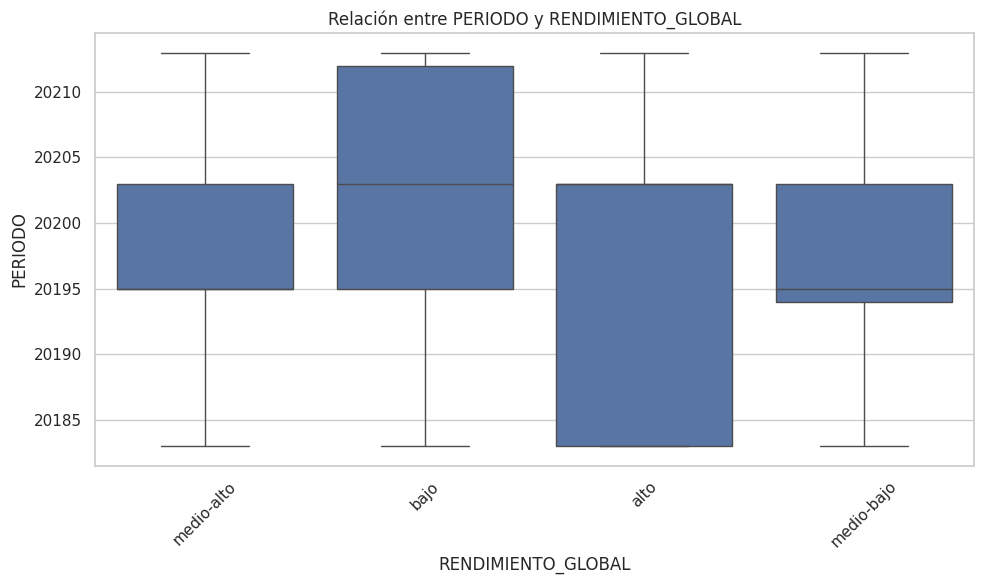


ANOVA - Diferencias entre grupos:
F-statistic: 813.8463
p-value: 0.0000
Interpretación: Hay diferencias significativas entre grupos (p<0.05)

--------------------------------------------------
Análisis de la variable: coef_1
--------------------------------------------------

Estadísticas descriptivas:


count    692500.000000
mean          0.268629
std           0.122130
min           0.000000
25%           0.203000
50%           0.240000
75%           0.314000
max           0.657000
Name: coef_1, dtype: float64

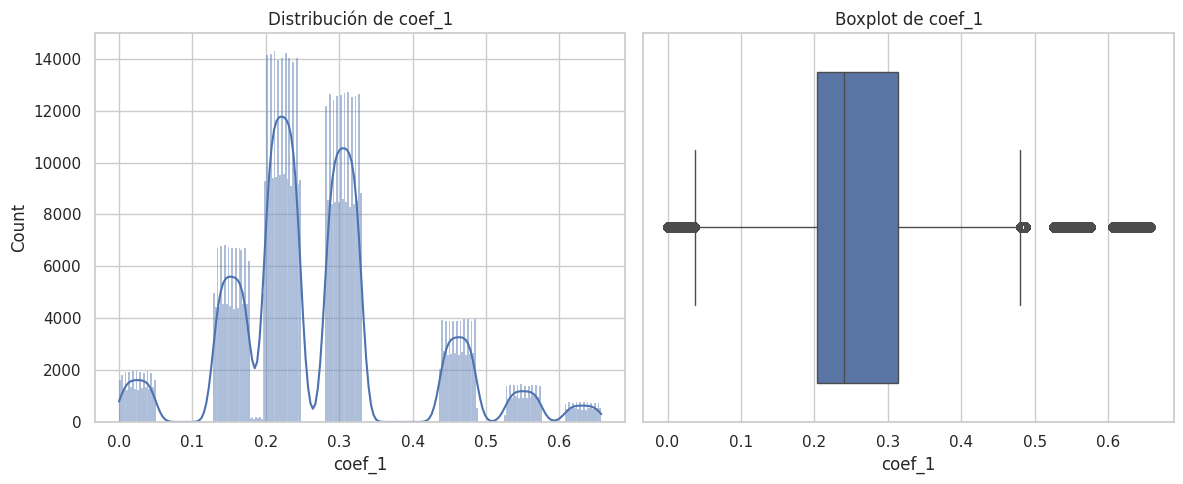


Relación entre coef_1 y RENDIMIENTO_GLOBAL:


,mean,median,std,min,max
RENDIMIENTO_GLOBAL,,,,,
alto,0.32,0.30,0.14,0.0,0.66
bajo,0.23,0.22,0.11,0.0,0.66
medio-alto,0.27,0.24,0.12,0.0,0.66
medio-bajo,0.25,0.23,0.11,0.0,0.66


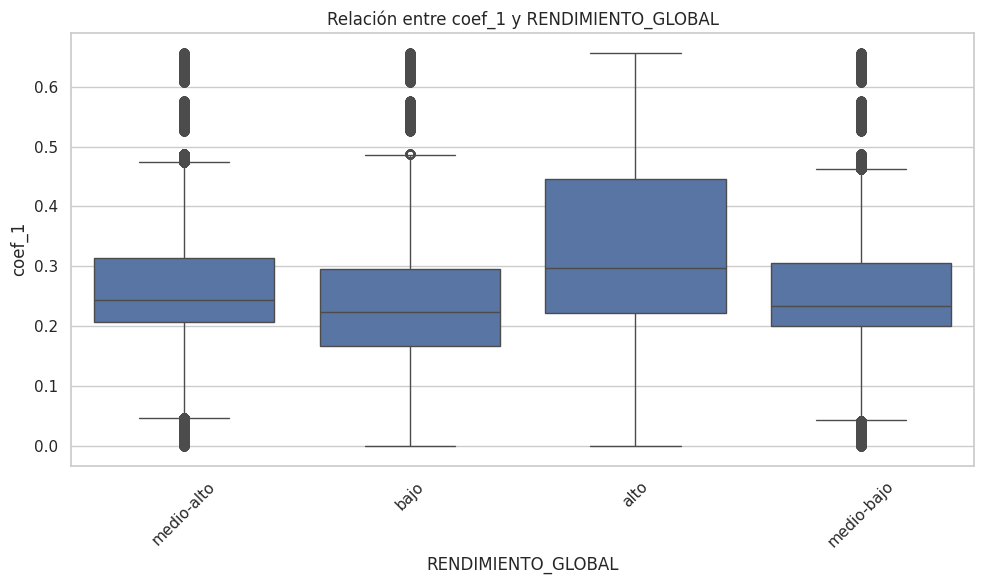


ANOVA - Diferencias entre grupos:
F-statistic: 15660.9133
p-value: 0.0000
Interpretación: Hay diferencias significativas entre grupos (p<0.05)

--------------------------------------------------
Análisis de la variable: coef_2
--------------------------------------------------

Estadísticas descriptivas:


count    692500.000000
mean          0.259996
std           0.093480
min           0.000000
25%           0.212000
50%           0.271000
75%           0.309000
max           0.487000
Name: coef_2, dtype: float64

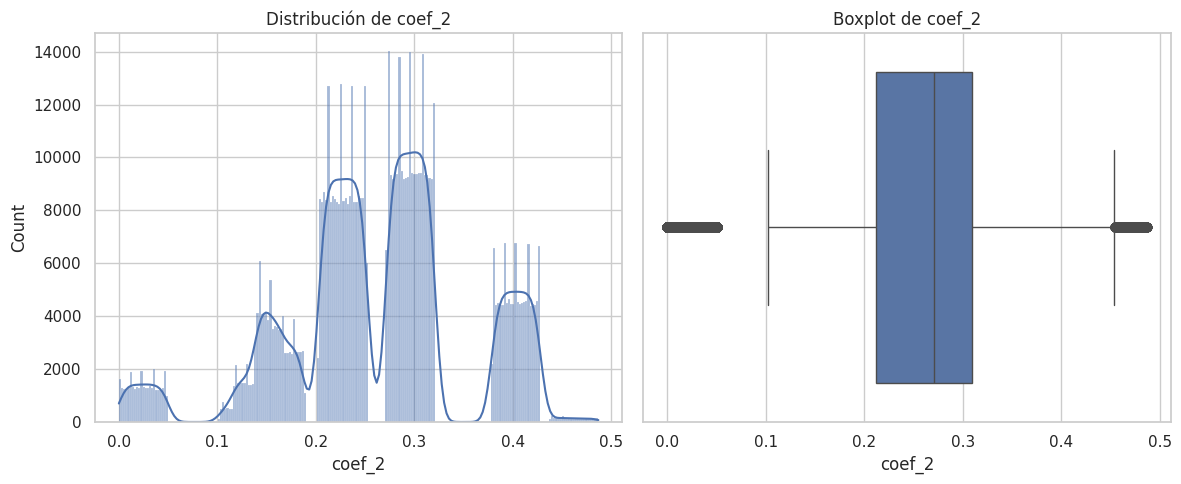


Relación entre coef_2 y RENDIMIENTO_GLOBAL:


,mean,median,std,min,max
RENDIMIENTO_GLOBAL,,,,,
alto,0.23,0.23,0.09,0.0,0.49
bajo,0.28,0.29,0.10,0.0,0.49
medio-alto,0.26,0.25,0.09,0.0,0.49
medio-bajo,0.27,0.28,0.09,0.0,0.49


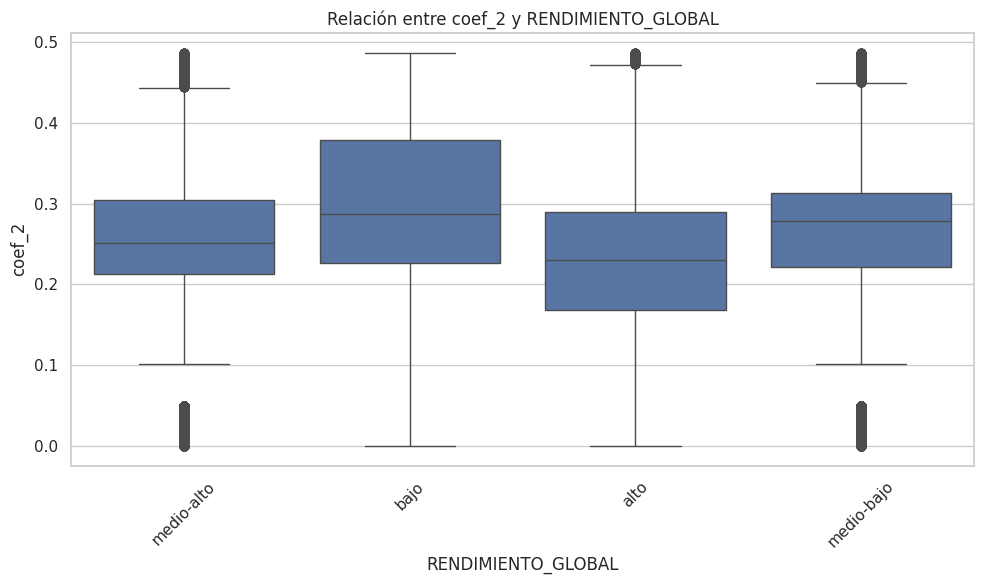


ANOVA - Diferencias entre grupos:
F-statistic: 9154.8883
p-value: 0.0000
Interpretación: Hay diferencias significativas entre grupos (p<0.05)


In [9]:
def analizar_variables_numericas(df, n_vars=3):
    """
    Analiza las variables numéricas del dataset y su relación con la variable objetivo
    
    Args:
        df (DataFrame): Dataset a analizar
        n_vars (int): Número máximo de variables a analizar
    """
    if df is None:
        return
    
    # Identificar variables numéricas (excluyendo ID)
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    numeric_cols = [col for col in numeric_cols if col != 'ID']
    
    if not numeric_cols:
        print("\nNo se encontraron variables numéricas para analizar.")
        return
    
    print(f"\n{'='*50}")
    print(f"ANÁLISIS DE VARIABLES NUMÉRICAS (Top {min(n_vars, len(numeric_cols))})")
    print(f"{'='*50}")
    
    # Limitar el número de variables a analizar
    numeric_cols = numeric_cols[:n_vars]
    
    for col in numeric_cols:
        print(f"\n{'-'*50}")
        print(f"Análisis de la variable: {col}")
        print(f"{'-'*50}")
        
        # Estadísticas descriptivas
        stats = df[col].describe()
        print("\nEstadísticas descriptivas:")
        display(stats)
        
        # Visualización de la distribución
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribución de {col}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col].dropna())
        plt.title(f'Boxplot de {col}')
        
        plt.tight_layout()
        plt.show()
        
        # Relación con la variable objetivo (si existe)
        if 'RENDIMIENTO_GLOBAL' in df.columns:
            print(f"\nRelación entre {col} y RENDIMIENTO_GLOBAL:")
            
            # Estadísticas por grupo
            group_stats = df.groupby('RENDIMIENTO_GLOBAL')[col].agg(['mean', 'median', 'std', 'min', 'max']).round(2)
            display(group_stats)
            
            # Visualización de la relación
            plt.figure(figsize=(10, 6))
            sns.boxplot(x='RENDIMIENTO_GLOBAL', y=col, data=df)
            plt.title(f'Relación entre {col} y RENDIMIENTO_GLOBAL')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            
            # ANOVA para verificar si hay diferencias significativas entre grupos
            try:
                from scipy import stats as scipy_stats
                
                # Crear grupos para ANOVA
                groups = []
                for category in df['RENDIMIENTO_GLOBAL'].unique():
                    group = df[df['RENDIMIENTO_GLOBAL'] == category][col].dropna()
                    groups.append(group)
                
                # Realizar ANOVA
                f_stat, p_value = scipy_stats.f_oneway(*groups)
                print(f"\nANOVA - Diferencias entre grupos:")
                print(f"F-statistic: {f_stat:.4f}")
                print(f"p-value: {p_value:.4f}")
                print(f"Interpretación: {'Hay diferencias significativas entre grupos (p<0.05)' if p_value < 0.05 else 'No hay diferencias significativas entre grupos (p>=0.05)'}")
            
            except Exception as e:
                print(f"No se pudo realizar ANOVA: {e}")

# Analizar variables numéricas en el dataset de entrenamiento
if train_df is not None:
    analizar_variables_numericas(train_df)